<a href="https://colab.research.google.com/github/Ahibala/Insurance-Premium-Prediction-/blob/main/Insurance_premium_prediction_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries and loading the dataset

## Import libraries

In [82]:
# Import Libraries

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix


## Data set

In [97]:
# Loading the dataset to a pandas Dataframe 
DF=pd.read_csv('/content/drive/MyDrive/project/Machine_Learning/Insurance_premium_prediction/insurance.csv')
DF

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


# Data preprocessing 

In [98]:
#cheking for missing vaules
DF.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [99]:
# Convert 'expenses' into a binary variable: low (0) or high (1)
threshold = DF['expenses'].quantile(0.5)
DF['expenses'] = np.where(DF['expenses'] > threshold, 1, 0)
DF

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,1
1,18,male,33.8,1,no,southeast,0
2,28,male,33.0,3,no,southeast,0
3,33,male,22.7,0,no,northwest,1
4,32,male,28.9,0,no,northwest,0
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,1
1334,18,female,31.9,0,no,northeast,0
1335,18,female,36.9,0,no,southeast,0
1336,21,female,25.8,0,no,southwest,0


In [100]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
DF['sex'] = le.fit_transform(DF['sex'])
DF['smoker'] = le.fit_transform(DF['smoker'])
DF['region'] = le.fit_transform(DF['region'])
DF

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,1
1,18,1,33.8,1,0,2,0
2,28,1,33.0,3,0,2,0
3,33,1,22.7,0,0,1,1
4,32,1,28.9,0,0,1,0
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,1
1334,18,0,31.9,0,0,0,0
1335,18,0,36.9,0,0,2,0
1336,21,0,25.8,0,0,3,0


In [101]:
DF.to_csv('Data_set_NN.csv', index=False)

## Set y to the label. Check the shape!

In [102]:
y = np.array(DF.iloc[:,-1]).T
y = np.array([y]).T
print("y is\n", y)

y is
 [[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


## Normalize the data 

In [103]:
## Normalize the data (not the label!)
## or min/max
## normalized_df=(df-df.min())/(df.max()-df.min())

DF=DF.iloc[:, [0,1, 2, 3, 4, 5]]
DF=(DF-DF.mean())/DF.std()
print(DF)

X = pd.DataFrame(np.array(DF))

print("X is\n", X)

           age       sex       bmi  children    smoker    region
0    -1.438227 -1.010141 -0.453476 -0.908274  1.969850  1.343402
1    -1.509401  0.989221  0.513994 -0.078738 -0.507273  0.438331
2    -0.797655  0.989221  0.382811  1.580335 -0.507273  0.438331
3    -0.441782  0.989221 -1.306161 -0.908274 -0.507273 -0.466741
4    -0.512957  0.989221 -0.289498 -0.908274 -0.507273 -0.466741
...        ...       ...       ...       ...       ...       ...
1333  0.768185  0.989221  0.054855  1.580335 -0.507273 -0.466741
1334 -1.509401 -1.010141  0.202436 -0.908274 -0.507273 -1.371813
1335 -1.509401 -1.010141  1.022325 -0.908274 -0.507273  0.438331
1336 -1.295877 -1.010141 -0.797830 -0.908274 -0.507273  1.343402
1337  1.551106 -1.010141 -0.256703 -0.908274  1.969850 -0.466741

[1338 rows x 6 columns]
X is
              0         1         2         3         4         5
0    -1.438227 -1.010141 -0.453476 -0.908274  1.969850  1.343402
1    -1.509401  0.989221  0.513994 -0.078738 -0.507273  0.4

## seperate data into testing and traning set

In [104]:
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1003, 6)
y_train shape: (1003, 1)
X_test shape: (335, 6)
y_test shape: (335, 1)


In [105]:
X_train

,0,1,2,3,4,5
313,0.697011,0.989221,0.858347,-0.908274,-0.507273,0.438331
724,0.768185,-1.010141,-0.584658,-0.078738,-0.507273,-1.371813
13,1.195233,-1.010141,1.497861,-0.908274,-0.507273,0.438331
55,1.337582,0.989221,1.038723,0.750799,1.969850,-0.466741
1335,-1.509401,-1.010141,1.022325,-0.908274,-0.507273,0.438331
...,...,...,...,...,...,...
368,0.341138,0.989221,0.218833,0.750799,-0.507273,-0.466741
48,1.479931,-1.010141,-1.011001,-0.908274,-0.507273,0.438331
772,0.341138,-1.010141,0.956734,-0.908274,-0.507273,-1.371813
1231,-1.367052,-1.010141,-1.453741,-0.908274,1.969850,1.343402


In [106]:
X_test

,0,1,2,3,4,5
831,-0.228259,-1.010141,-0.797830,-0.908274,-0.507273,-0.466741
1287,-0.228259,-1.010141,-0.781432,-0.078738,-0.507273,1.343402
1259,0.910535,-1.010141,-1.224172,-0.908274,-0.507273,-1.371813
827,-0.228259,0.989221,-0.437078,-0.078738,1.969850,-1.371813
933,0.412313,-1.010141,0.759960,-0.908274,-0.507273,1.343402
...,...,...,...,...,...,...
337,1.622280,0.989221,-0.502670,-0.078738,-0.507273,-0.466741
72,0.981709,-1.010141,-0.420681,1.580335,-0.507273,1.343402
1107,0.768185,-1.010141,-0.732239,0.750799,-0.507273,-0.466741
931,-0.014735,-1.010141,0.300822,-0.078738,-0.507273,1.343402


In [107]:
X_train.to_csv('Data_set_NN_Training.csv', index=False)
X_test.to_csv('Data_set_NN_Testing.csv', index=False)

## Initializing the input for neural network

In [108]:
InputColumns = 6
NumberOfLabels = 2
n = len(DF) ## number of rows of entire X
## Take the label off of X and make it a numpy array

# Assuming the learning rate 

LR=.01
LRB = .01

# Defining the Neural Network class and its methods:

In [109]:
class NeuralNetwork(object):
  def __init__(self):        
    self.InputNumColumns = InputColumns  ## columns
    self.OutputSize = 1 ## Categories
    self.HiddenUnits = 4  ## one layer with h units
    self.n = n  ## number of training examples, n
    
    print("Initialize NN\n")
    #Random W1
    self.W1 = np.random.randn(self.InputNumColumns, self.HiddenUnits) # c by h  
    
    print("INIT W1 is\n", self.W1)
    
    ##-----------------------------------------
    ## NOTE ##
    ##
    ## The following are all random. However, you can comment this out
    ## and can set any weights and biases by hand , etc.
    ##
    ##---------------------------------------------
    
    self.W2 = np.random.randn(self.HiddenUnits, self.OutputSize) # h by o 
    print("W2 is:\n", self.W2)
    
    self.b = np.random.randn(1, self.HiddenUnits)
    print("The b's are:\n", self.b)
    ## biases for layer 1
    
    self.c = np.random.randn(1, self.OutputSize)
    print("The c is\n", self.c)
    ## bias for last layer

  def FeedForward(self, X):
      print("FeedForward\n\n")
      self.z = (np.dot(X, self.W1)) + self.b 
      #X is n by c   W1  is c by h -->  n by h
      print("Z1 is:\n", self.z)
      
      self.h = self.Sigmoid(self.z) #activation function    shape: n by h
      print("H is:\n", self.h)
      
      self.z2 = (np.dot(self.h, self.W2)) + self.c # n by h  @  h by o  -->  n by o  
      print("Z2 is:\n", self.z2)
      
      ## Using Softmax for the output activation
      output = self.Sigmoid(self.z2)  
      print("output Y^ is:\n", output)
      return output

  def Sigmoid(self, s, deriv=False):
    if (deriv == True):
      return s * (1 - s)
    return 1/(1 + np.exp(-s))

  def BackProp(self, X, y, output):


    print("\n\nBackProp\n")

    # Learning rates for weights and biases
    self.LR = LR
    self.LRB = LRB

    # Output error (Y^ - Y)
    self.output_error = output - y
    print("Y^ - Y\n", self.output_error)

        ## NOTE TO READER........................
    ## Here - we DO NOT multiply by derivative of Sig for y^ b/c we are using 
    ## cross entropy and softmax for the loss and last activation
    # REMOVED # self.output_delta = self.output_error * self.Sigmoid(output, deriv=True) 
    ## So the above line is commented out...............
    

    # Output delta (Y^ - Y)
    self.output_delta = self.output_error

    #..............Backpropagation output -> hidden (cost function derivative)......................
    
    # Compute the error contribution from hidden layer to output layer (Y^ - Y)(W2)
    self.D_Error_W2 = self.output_delta.dot(self.W2.T)

    # Compute the gradient for W2: h.T * output_delta
    self.h_output_delta = self.h.T.dot(self.output_delta)

    # Update W2 using the learning rate and the gradient
    self.W2 = self.W2 - self.LR * self.h_output_delta

    # Update bias c
    self.c = self.c - self.LR * np.mean(self.output_delta, axis=0)

    #................Backpropagation hidden -> input (activation function derivative)....................

    # Compute the gradient for the hidden layer: (H)(1 - H) (Y^ - Y)(W2)
    self.H_D_Error_W2 = self.D_Error_W2 * self.Sigmoid(self.h, deriv=True)

    # Compute the gradient for W1: X.T * H_D_Error_W2
    self.X_H_D_Error_W2 = X.T.dot(self.H_D_Error_W2)

    # Update W1 using the learning rate and the gradient
    self.W1 = self.W1 - self.LR * self.X_H_D_Error_W2

    # Update biases b
    self.b = self.b - self.LRB * np.mean(self.H_D_Error_W2, axis=0)

    # Print updated weights and gradients
    print("The W1 is: \n", self.W1)
    print("The W1 gradient is: \n", self.X_H_D_Error_W2)
    print("The W2 gradient is: \n", self.h_output_delta)
    print("The biases b gradient is:\n", np.mean(self.H_D_Error_W2, axis=0))
    print("The bias c gradient is: \n", np.mean(self.output_delta, axis=0))


  def TrainNetwork(self, X, y):
    output = self.FeedForward(X)
    print("Output in TNN\n", output)
    self.BackProp(X, y, output)
    return output

# Creating Neural Network class and training it

In [110]:
MyNN = NeuralNetwork()

TotalLoss=[]
AvgLoss=[]
Epochs=500

for i in range(Epochs): 
    print("\nRUN:\n ", i)
    output = MyNN.TrainNetwork(X_train, y_train)

    print("The output is: \n", output)
    output = np.where(output > 0.5, 1, 0)
    print('Prediction y^ is', output)

    loss = np.sum(np.square(output - y_train))
    avgLoss = np.mean(np.square(output - y_train))
    print("The current average loss is\n", loss)
    TotalLoss.append(loss)
    AvgLoss.append(avgLoss)


Streaming output truncated to the last 5000 lines.

RUN:
  450
FeedForward


Z1 is:
 [[ -1.22143028   3.38556296   0.1990767    2.17009309]
 [ -5.28639482  -1.46496607   1.30498427  -0.79407158]
 [ -6.31800236   2.02500547   3.59187215  -2.13523223]
 ...
 [ -3.23528086  -0.94811706   0.29614813   3.39324671]
 [ 11.27999087  -6.05442411   4.34637942 -10.43440618]
 [ -1.00237652  -1.9546119   -2.2918728    0.68771181]]
H is:
 [[2.27684845e-01 9.67250283e-01 5.49605456e-01 8.97531529e-01]
 [5.03449513e-03 1.87708953e-01 7.86672633e-01 3.11295091e-01]
 [1.80029584e-03 8.83397595e-01 9.73191768e-01 1.05719301e-01]
 ...
 [3.78594159e-02 2.79263654e-01 5.73500627e-01 9.67492810e-01]
 [9.99987377e-01 2.34195598e-03 9.87212023e-01 2.94023609e-05]
 [2.68474426e-01 1.24051348e-01 9.17982923e-02 6.65457713e-01]]
Z2 is:
 [[-2.38522427]
 [ 4.4799627 ]
 [ 5.92869355]
 ...
 [-2.33688288]
 [15.11906235]
 [-1.97349578]]
output Y^ is:
 [[0.08430638]
 [0.98879318]
 [0.99734511]
 ...
 [0.08811405]
 [0.9999

# visualizing the results

FeedForward


Z1 is:
 [[-0.06278423  1.94631221 -1.98624646  8.139713  ]
 [ 0.86243659  4.60898698 -2.25346426  7.46727786]
 [-5.91816665 -0.06788344  2.08498784 -0.53745448]
 ...
 [-4.9529524  -0.3293344   1.2405112  -1.58265368]
 [-0.23139151  4.05315999 -1.21933961  5.90239025]
 [ 4.90897675  3.42269312 -5.11483143  7.8707284 ]]
H is:
 [[0.4843091  0.87504397 0.12065454 0.99970836]
 [0.70316948 0.99013636 0.09505106 0.99942884]
 [0.00268291 0.48303565 0.88943549 0.36877993]
 ...
 [0.007013   0.41840258 0.77565298 0.17041998]
 [0.44240886 0.98292907 0.22805269 0.99727454]
 [0.99267403 0.96840627 0.00597112 0.99961839]]
Z2 is:
 [[-4.83166198]
 [-3.90243444]
 [ 4.29354472]
 [15.77421592]
 [-3.08131632]
 [ 1.42306503]
 [11.95792915]
 [-0.93691268]
 [14.67969334]
 [10.9268359 ]
 [15.58373265]
 [15.77787405]
 [ 6.09101171]
 [-2.77342645]
 [ 6.89980563]
 [ 2.58183139]
 [15.75721912]
 [15.69023508]
 [-3.82673065]
 [-2.75403446]
 [-2.51705562]
 [-3.15663624]
 [15.77493042]
 [-3.93063247]
 [-

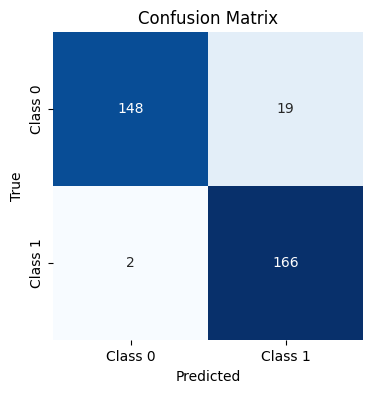

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Use the trained neural network to make predictions on the test data
test_output = MyNN.FeedForward(X_test)

# Convert the output to binary predictions
test_predictions = np.where(test_output > 0.5, 1, 0)

# Calculate the confusion matrix
cm = confusion_matrix(test_predictions, y_test)

# Plot the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [112]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy for the test data
test_accuracy = accuracy_score(test_predictions, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.9373134328358209
